In [1]:
# Predicting Bee Colonies Survival 

In [38]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sqlite3
from sqlalchemy import create_engine
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
## Load Data 
database_path = Path("./save_the_bees.db")

# SQLite database connection
conn = create_engine(f"sqlite:///{database_path}")

# SQL query to retrieve data
sql_query = "SELECT * FROM bee_colonies"

# Read data into a DataFrame
bee_data = pd.read_sql(sql_query, conn)



In [40]:
# Data Cleaning
bee_data = bee_data[['state', 'num_colonies', 'max_colonies', 'lost_colonies',
       'percent_lost', 'added_colonies', 'renovated_colonies',
       'percent_renovated', 'quarter', 'year', 'varroa_mites',
       'other_pests_and_parasites', 'diseases', 'pesticides', 'other',
       'unknown']]


In [41]:
bee_data.describe()

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
count,1.453000e+03,1.453000e+03,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1.238883e+05,1.558856e+05,16694.542326,11.219546,15819.036476,13601.734343,7.158981,2.505850,2018.474191,30.186098,10.937509,3.406676,6.185272,6.083345,3.994907
std,4.384485e+05,5.535112e+05,60673.470186,7.375083,63545.779316,57225.881599,9.038191,1.132782,2.322824,18.861293,13.035092,6.472063,8.959392,6.488208,4.939563
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,9.500000e+03,950.000000,6.000000,380.000000,150.000000,1.000000,1.000000,2016.000000,15.600000,1.900000,0.100000,0.400000,1.800000,0.800000
50%,1.850000e+04,2.300000e+04,2200.000000,10.000000,1600.000000,800.000000,4.000000,3.000000,2018.000000,27.200000,7.000000,1.100000,2.600000,4.100000,2.400000
75%,5.800000e+04,7.900000e+04,7000.000000,14.000000,6000.000000,3700.000000,10.000000,4.000000,2021.000000,42.200000,15.100000,4.200000,8.500000,8.200000,5.400000
max,3.181180e+06,5.153870e+06,502350.000000,65.000000,736920.000000,762550.000000,77.000000,4.000000,2022.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000


In [42]:
# Feature Engineering
bee_data = pd.get_dummies(bee_data, columns=['state'], dtype=int)
bee_data

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,...,state_Tennessee,state_Texas,state_United States,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,7000,7000,1800,26,2800,250,4,1,2015,10.0,...,0,0,0,0,0,0,0,0,0,0
1,35000,35000,4600,13,3400,2100,6,1,2015,26.9,...,0,0,0,0,0,0,0,0,0,0
2,13000,14000,1500,11,1200,90,1,1,2015,17.6,...,0,0,0,0,0,0,0,0,0,0
3,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,...,0,0,0,0,0,0,0,0,0,0
4,3500,12500,1500,12,200,140,1,1,2015,14.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,7500,8000,1100,14,0,220,3,4,2022,33.4,...,0,0,0,0,0,0,0,1,0,0
1449,26000,47000,3500,7,140,380,1,4,2022,23.2,...,0,0,0,0,0,0,0,0,1,0
1450,19500,21000,3200,15,640,0,0,4,2022,22.9,...,0,0,0,0,0,0,0,0,0,1
1451,30030,30030,480,2,1190,130,0,4,2022,22.4,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Remove Unnecessary Columns
bee_data = bee_data[['num_colonies', 'max_colonies', 'lost_colonies', 'percent_lost',
       'added_colonies', 'renovated_colonies', 'percent_renovated', 'quarter',
       'year', 'varroa_mites', 'other_pests_and_parasites', 'diseases',
       'pesticides', 'other', 'unknown', 'state_Alabama', 'state_Arizona',
       'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Florida', 'state_Georgia', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_North Dakota', 'state_Ohio', 'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania', 'state_South Carolina',
       'state_South Dakota', 'state_Tennessee', 'state_Texas', 'state_Utah', 'state_Vermont', 'state_Virginia',
       'state_Washington', 'state_West Virginia', 'state_Wisconsin',
       'state_Wyoming']]
bee_data

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,7000,7000,1800,26,2800,250,4,1,2015,10.0,...,0,0,0,0,0,0,0,0,0,0
1,35000,35000,4600,13,3400,2100,6,1,2015,26.9,...,0,0,0,0,0,0,0,0,0,0
2,13000,14000,1500,11,1200,90,1,1,2015,17.6,...,0,0,0,0,0,0,0,0,0,0
3,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,...,0,0,0,0,0,0,0,0,0,0
4,3500,12500,1500,12,200,140,1,1,2015,14.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,7500,8000,1100,14,0,220,3,4,2022,33.4,...,0,0,0,0,0,0,0,1,0,0
1449,26000,47000,3500,7,140,380,1,4,2022,23.2,...,0,0,0,0,0,0,0,0,1,0
1450,19500,21000,3200,15,640,0,0,4,2022,22.9,...,0,0,0,0,0,0,0,0,0,1
1451,30030,30030,480,2,1190,130,0,4,2022,22.4,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Model Iteration Function
def model_iteration(X, y, model, scaler=None, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    classifier = model(random_state=random_state)
    classifier.fit(X_train_scaled, y_train)

    train_accuracy = classifier.score(X_train_scaled, y_train)
    test_accuracy = classifier.score(X_test_scaled, y_test)

    print(f"Training Data Score: {train_accuracy * 100:.2f}%")
    print(f"Testing Data Score: {test_accuracy * 100:.2f}%")

    predictions = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {accuracy * 100:.2f}%")

    # Return the scaled training data and y_train
    return classifier, X_train_scaled, y_train


In [94]:
# Model Iteration 1

In [95]:
y = bee_data["percent_lost"]
X = bee_data[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]
scaler = StandardScaler()
model_percent_lost = model_iteration(X, y, LogisticRegression, scaler, random_state=1)

Training Data Score: 13.00%
Testing Data Score: 8.37%
Accuracy Score: 8.37%


In [96]:
# Binning Percent_Lost
bee_data["percent_lost"].describe()

count    1193.000000
mean       10.961442
std         7.257270
min         0.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        65.000000
Name: percent_lost, dtype: float64

In [97]:
# Creating Bins for Colonies Lost
bins = [-1, 15, 70]
group_labels = [0, 1]
bee_data["target"] = pd.cut(bee_data["percent_lost"], bins, labels=group_labels)

#Reset index after removing the outliers
bee_data = bee_data.dropna().reset_index(drop=True)

In [98]:
bee_data["target"].value_counts()

target
0    965
1    228
Name: count, dtype: int64

In [99]:
# Model Iteration 2

In [100]:
y = bee_data["target"]
X = bee_data[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]
model_target = model_iteration(X, y, LogisticRegression, StandardScaler())

Training Data Score: 81.03%
Testing Data Score: 81.17%
Accuracy Score: 81.17%


In [101]:
# Model Iteration 3

In [102]:
# Remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = (data[column] < lower_bound) | (data[column] > upper_bound)
    return data[~outliers_indices]





In [103]:
# Remove outliers for "other_pests_and_parasites" column
bee_data = remove_outliers(bee_data, "other_pests_and_parasites")

In [104]:
# Remove outliers for "diseases" column
bee_data = remove_outliers(bee_data, "diseases")

In [105]:
y = bee_data["target"]
X = bee_data[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]
model_no_outliers = model_iteration(X, y, LogisticRegression, StandardScaler())

Training Data Score: 82.26%
Testing Data Score: 78.60%
Accuracy Score: 78.60%


In [106]:
# Model Iteration 4

In [107]:
# Model Iteration 4
y = bee_data["target"]
X = bee_data[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]
model_4, _, _ = model_iteration(X, y, RandomForestClassifier, random_state=42)

Training Data Score: 100.00%
Testing Data Score: 84.28%
Accuracy Score: 84.28%


In [108]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
model_4, _, _ = model_iteration(X_train, y_train, RandomForestClassifier, scaler, random_state=42)

Training Data Score: 100.00%
Testing Data Score: 86.34%
Accuracy Score: 86.34%


In [110]:
# Make predictions
predictions = model_4.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [111]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(model_4.feature_importances_, X.columns), reverse=True), columns=['Importance', 'Feature'])
importances_sorted = importances_df.sort_values(by='Importance')

C:\Users\shade\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shade\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shade\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


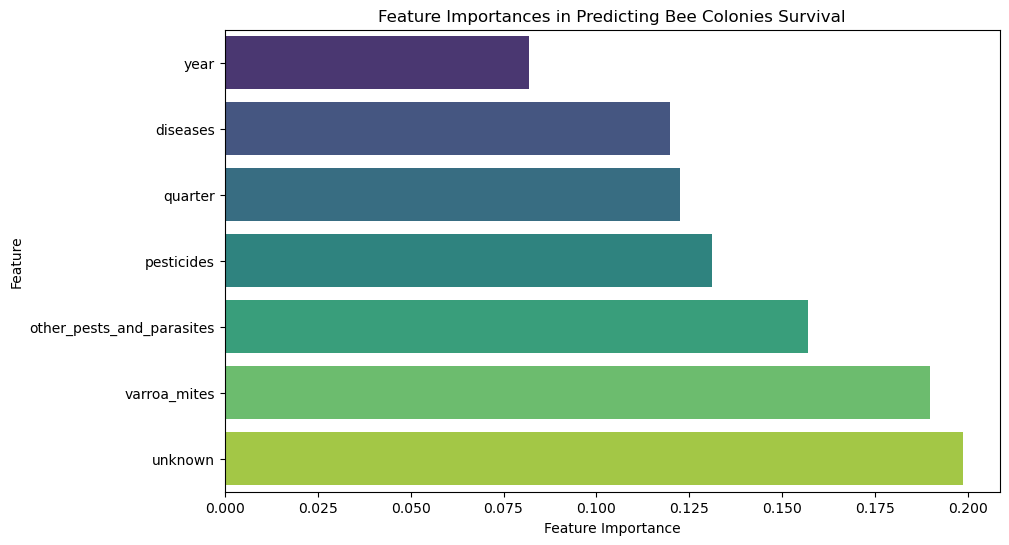

In [112]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_sorted, palette='viridis')
plt.title('Feature Importances in Predicting Bee Colonies Survival')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()